# A Scientific Approach to Assessing the Sustainability of the Hotel Industry in the United States
### Contributors: Kenneth Bansah, Aeron Cable, Jacob Hartmann, Joshua Johnson, Joseph McEvoy, Logan Willson

## Overview

This project aims to identify some of the major factors that can affect the sustainability of hotels. We rely largely on U.S. hotel data retrieved from Kaggle Datasets and literature to answer 10 research questions. The dataset has more than 119,000 samples and will be preprocessed and processed using Python 3. Modeling and prediction will also be done in the Python 3 environment using the Jupyter Notebook. The study goes beyond the pseudotransactionality of meeting instructor requirements to contributing significantly to scholarly discourse on the sustainability of hotels. Findings from the study will be published in peer reviewed journals and conferences. 

Initial finding from different regressions have shown that the factor most likely to cause a cancellation is whether a deposit was required to secure the booking.  Bookings with no required deposit saw higher cancellation rates.  Additional regression showed that repeated guests typically had shorter lead times, and that guests with babies typically had a higher amount of special requests.


## Introduction

The hospitality industry plays a significant role in the economic development of every nation, providing revenue to both national and local governments and employing many people. Further, many people derive their livelihoods and incomes from the hospitality industry. Hotels, a major player in the hospitality industry, serve the needs of travelers, business visitors, and tourists (Lawson, 2015). Additionally, hotels serve individuals who need temporary accommodation among several other reasons. 

Data shows that the U.S. hotel industry employs about 2.3 million people and in 2018, contributed \$659.4 billion to the U.S. gross domestic product (Wroten, 2019). Thus, it is crucial to ensure the sustainability of the hotel industry so that it continues to serve the needs of the people and to provide revenue and incomes.

A few scholarly research works have been conducted around factors that could impact the sustainability of the hotel industry. For example, Wilkins, Merrilees, and Herington (2007) used exploratory and confirmatory factor analysis and structural modeling and concluded that customers rated quality of service as an important indicator for choosing a hotel, while Saleh and Ryan (1992, p.1) observed that ‘availability of a restaurant, convenient parking, interior decor and exterior aesthetics’ were factors customers consider when selecting a hotel. While Su (2004) found that customers were not satisfied with their hotel services, Poon and Low (2005) observed that satisfaction levels varied among Asian and Western travelers. 

These studies typically used social science research techniques such as focus groups, surveys, interviews, and thematic and content analyses to draw conclusions. The sample sizes in the studies were relatively small, mostly ranging from 50 to 600 study participants. In this study, however, we aim to perform a more rigorous scientific analysis by relying on hotel data of 32 variables and more than 119,000 samples. 

According to a study sponsored by the American Hotel & Lodging Association and the American Hotel & Lodging Educational Foundation, the U.S. hotel industry generated \$42.4 billion in direct capital investment in 2018 and supported more than 329,000 direct jobs from the construction and renovation of hotel projects (Wroten, 2019). It is important to note that customers are critical in sustaining the hotel industry. Without customers to frequent the hotels, the huge capital investment injected into the construction of hotels could have a debilitating ramification for the investors. In addition, governments will lose revenue, jobs will decline, and livelihoods will be significantly affected. We contribute to the scholarly discourse on sustainability of the hotel industry by attempting to answer the following questions:

●	Whether Asian or western travelers prefer city hotels or resort hotels?

●	If adult customers with children are more likely to cancel their reservation?

●	If guests with family have a higher reservation lead time than guests without families?

●	Which country’s citizens mostly prefer resort hotels?

●	What are the most preferred meals for guests?

●	What is the probability that the room the customer reserved will be assigned to them?

●	What is the meal preference for guests from countries with the most reservations?

●	If car parking space is a factor in deciding on the choice of a hotel?

●	What hotel type (resort or city) is mostly preferred by guests?

●	Which type of guest is likely to make special requests?

●	How does the average daily rate impact the choice of a hotel?

These questions could help unravel important factors that contribute to customer satisfaction and the sustainability of hotels. The findings of this study will be disseminated via journal and conference publications to contribute to the existing body of knowledge and to help improve the hotel industry in the United States and other countries that recognize hotels and the hospitality industry as an important economic sector for development. 

## Data Source and Collection

The data for this proposed study is retrieved from kaggle.com (https://www.kaggle.com/jessemostipak/hotel-booking-demand) and includes customer reservations of hotels from July 2015 to August 2017. There are 32 variables and 119,390 observations. The variables include details such as type of hotel, date of arrival and departure, meals, nationality of guests, and average daily rates. 
The CSV file containing the dataset has a combination of values and string data and will be relied on in this study to answer the research questions. Python 3 will be used for modeling and prediction and the results and findings will be interpreted and discussed following sound scientific principles. Additional existing scholarly literature will be reviewed and used to support our analysis, interpretation, and discussion.


## Significance of study and scientific contribution

As previously stated, hotels play a significant role in the economic development of every nation and anything that undermines their sustainability should be investigated and addressed. While a few researchers have studied some of the factors that could potentially affect the sustainability of hotels, their work relied mainly on qualitative social science research methods that lack scientific rigor. We fill the gaps in those studies and introduce new perspectives on the conduct of research that border on sustainability of hotels by using a three-year dataset. We expect to identify the most important factors that can affect the sustainability of hotels and publish our findings in peer reviewed journal and conference papers. The findings will help improve the hotel industry and ensure its sustainability.

## Methods

This research project will use a variety of common data science and business analytics tools to analyze the data and attempt to pull information that could show insight into the conditions of the hotel industry. We will use methods such as data visualization, regression analysis, and fitting models to identify and remove outliers, show trends, and enable prediction of data elements based on the given observations. For example, Zhao, Xu, and Wang (2019) used multiple regression to predict customer satisfaction with hotel bookings and stay. Shi and Li (2011) used support vector machine (SVM) based supervised machine learning models for sentiment classification of hotel reviews. Antonio, de Almeida and Nunes (2017) employed data visualization, data mining and machine learning to develop a machine learning prototype that aimed to help reduce booking cancellations in the hotel industry. 

Several of these data science techniques will be adopted in this current research project. The way we will use many of these methods is through pandas because it is very useful for data analysis and manipulation of the dataset. Data manipulation will be important for this dataset because there are non-numerical variables we will have to convert. Some of the numerical variables correlate to a non-numerical value. We will convert those variables to useful versions that will allow us to do better analysis.


## Research Investigators

The research investigators include Kenneth Bansah, Logan Willson, Jacob Hartmann, Aeron Cable, Joshua Johnson, and Joseph Mcevoy. 

Kenneth Bansah received his PhD in mining engineering and master’s in geological engineering from Missouri S&T. He also received a master’s in mining engineering and a bachelor’s degree in mining from Ghana. He is currently working on Responsible Conduct of Research at S&T and has several years of experience in assessing sustainability of projects. 

Logan Willson is a senior in the Information Science and Technology B.S. degree program. He has seven years of professional IT experience and is in his final semester at Missouri S&T.

Jacob Hartmann is studying for an undergraduate degree in Information Science and Technology. As part of that study, he is pursuing a minor in Business Analytics and Data Science, among others.

Aeron Cable is currently attending Missouri University of Science and Technology obtaining a B.S. in Information Science and Technology and minor in Business. For over two years he has been using the information he has learned from university and has been applying it to his job as an Investigator for Truckz 4 Kids.

Joshua Johnson is a senior in IST and in his last year of school. He has spent his last two years working in an IT environment and hoping to enter the field he graduates.

Joey McEvoy is studying for a bachelor's degree in Information Science and Technology and pursuing also a minor in Cybersecurity Management and Information Assurance. He is hoping to use his education in order to one day become a chief information officer of a technology company.


## Preliminary Work

While exploring the dataset, we discovered that the company column was almost entirely made up of NULL characters.  Simply dropping these values resulted in the loss off all but 217 rows of data from our dataset.  Since the company variable had little correlation to the is_canceled variable, it was decided that the entire column would be dropped in order to maintain data integrity.  After this all NA values were dropped and a logistic regression was run against the is_canceled variable. We performed multiple linear regressions on several variables. They were lead_time, is_repeated_guest, arrival_date_week_number, days_in_waiting_list, booking_changes, and total_of_special_requests. This gave us some insight into whether there was an impact of any meaningful kind on the variables.

## Data Vizualization

For the visualizations we mostly used the seaborn package.  We chose to stick with more basic visualizations like boxplots and barcharts for now because we wanted to explore the dataset before we dive in headfirst. Some of the visualizations we created explored the number of hotel bookings cancelled, average daily rate paid, and number of visitors per month.  Some of the comparison visualizations we created dealt with comparing customer type and total number of requests, customer type and price paid, and price paid to the total number of special requests.  We had several interesting findings. One finding was that it seems there is possibly a trend when it comes to price and total of special requests.  Seasonality of hotels seems pretty apparent when looking at the total number of guests per month.  Some future visualizations we want to do are to compare what types of visitors tend to cancel their bookings.  We also want to check how many people are repeat vs new customers, type of room vs customer type, and which countries customers come from. We also performed a few regplots to see if there were any obvious trends in the variables and we appear to have a few outliers that we will address later on.

## References

Antonio, N., de Almeida, A., & Nunes, L. (2017). Predicting hotel bookings cancellation with a machine learning classification model. In 2017 16th IEEE International Conference on Machine Learning and Applications (ICMLA), 1049-1054. IEEE.

Lawson, F (2015). Hotels. In: Metric handbook: planning and design data. Routledge.

Poon, W. C., & Low, K. L. T. (2005). Are travelers satisfied with Malaysian hotels?. International Journal of Contemporary Hospitality Management.

Saleh, F., & Ryan, C. (1992). Client perceptions of hotels: A multi-attribute approach. Tourism Management, 13(2), 163-168.

Shi, H. X., & Li, X. J. (2011). A sentiment analysis model for hotel reviews based on supervised learning. In 2011 International Conference on Machine Learning and Cybernetics, 3, 950-954. IEEE.

Su, A. Y. L. (2004). Customer satisfaction measurement practice in Taiwan hotels. International Journal of Hospitality Management, 23(4), 397-408.

Wilkins, H., Merrilees, B., & Herington, C. (2007). Towards an understanding of total service quality in hotels. International Journal of Hospitality Management, 26(4), 840-853.

Wroten, B. (2019). The overall economic impact of the U.S. hotel industry. Retrieved from http://www.hotelnewsnow.com/Articles/298116/The-overall-economic-impact-of-the-US-hotel-industry. Accessed 02.19.2020

Zhao, Y., Xu, X., & Wang, M. (2019). Predicting overall customer satisfaction: Big data evidence from hotel online textual reviews. International Journal of Hospitality Management, 76, 111-121.


In [1]:
# Import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure inline mode
%matplotlib inline

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
for col in df.columns:
    print(col)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

From the above blocks of code we read in our dataset and view the different variables within.  We can see there are 32 variable and that while a majority of them are numeric, some are objects, which indicates we will need to modify our data in order to run certain analyses.

In [5]:
df["arrival_date_month"]

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object

In [6]:
#count of arrivals by month
df.drop_duplicates().arrival_date_month.value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

Here we are able to see which months are most popular for hotel visits.  We drop any duplicate entries to get a more accurate representation. You can see that the warmer months are more popular, with July and August being the most popular.

In [7]:
#count of canceled bookings
df.drop_duplicates().is_canceled.value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

This block shows us how often a booking was cancelled, with 0 indicating "not cancelled" and 1 indicating "cancelled".  You can see that there are significantly less cancellations than non-cancellations.

## Regression Analysis

In this section of the project we attempt to show if any variables have a significant effect on a customer's decision to cancel their booking.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
#df = df.dropna()
df_2 = df.drop(["company"], axis=1)
df_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Here we decided to drop the company column.  The column only represents the company that assisted in booking, and has significanly less data than the rest of the dataset.  After dropping this column we proceed to clean the rest of the dataset to remove null variables.

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df_2 = df_2.dropna()

In [12]:
df_2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2016.156977,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,0.706117,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [13]:
df_2.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.277666,0.004561,0.004172,-0.005468,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.029913,0.117983,-0.042589,-0.131714,-0.081939,0.052475,0.023284,-0.188298,-0.257934
lead_time,0.277666,1.000000,0.041082,0.120155,-0.003472,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.055432,0.100271,-0.045082,-0.000282,-0.068753,0.170352,-0.112652,-0.111226,-0.123047
arrival_date_year,0.004561,0.041082,1.000000,-0.530387,0.005206,0.020693,0.032807,0.061359,0.065394,-0.009828,-0.022428,-0.134031,0.015334,0.036468,0.063684,-0.061742,0.222059,-0.012864,0.121490
arrival_date_week_number,0.004172,0.120155,-0.530387,1.000000,0.057587,0.010114,0.013212,0.003496,-0.000687,0.007865,-0.013250,0.042645,-0.025095,0.008551,-0.030993,0.023822,0.062570,-0.001477,0.021639
arrival_date_day_of_month,-0.005468,-0.003472,0.005206,0.057587,1.000000,-0.016510,-0.030852,0.001151,0.013545,-0.002426,-0.008447,-0.024869,0.001447,0.011505,0.001731,0.024778,0.025590,0.004745,0.002560
stays_in_weekend_nights,-0.023589,0.047674,0.020693,0.010114,-0.016510,1.000000,0.486350,0.070997,0.039961,0.020068,-0.056987,-0.003021,-0.028041,0.054693,0.141387,-0.064610,0.016233,-0.011037,0.056110
stays_in_week_nights,0.003918,0.124195,0.032807,0.013212,-0.030852,0.486350,1.000000,0.071890,0.039922,0.021008,-0.057415,-0.013591,-0.029082,0.081598,0.183281,-0.009330,0.036263,-0.016376,0.050318
adults,0.037057,0.072477,0.061359,0.003496,0.001151,0.070997,0.071890,1.000000,0.014385,0.013307,-0.073802,-0.003366,-0.054299,-0.051995,-0.034489,-0.022945,0.237099,0.036907,0.116793
children,0.005409,-0.049796,0.065394,-0.000687,0.013545,0.039961,0.039922,0.014385,1.000000,0.016742,-0.018975,-0.025070,-0.009899,0.055324,0.041242,-0.036455,0.335729,0.065531,0.068130
babies,-0.032038,-0.021975,-0.009828,0.007865,-0.002426,0.020068,0.021008,0.013307,0.016742,1.000000,-0.006906,-0.007150,-0.002595,0.094213,0.036338,-0.010894,0.025584,0.039087,0.091729


Here we run a correlation analysis. From it we can see that lead time has a slight positive correlation to cancellations, so a customer is more likely to cancel if lead time is longer.  We can also see that previous cancellations has a positive correlation, and that booking changes has a negative correlation.  The negative correlation implies that customers with more booking changes are less likely to cancel.

In [14]:
df_2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Frequency Table

In [15]:
pd.crosstab(df_2.is_canceled, columns = "count")

col_0,count
is_canceled,
0,62733
1,40161


In [16]:
pd.crosstab(df_2.is_canceled, columns = "count")/pd.crosstab(df_2.is_canceled, columns = "count").sum()

col_0,count
is_canceled,
0,0.609686
1,0.390314


## Preprocessing Data

In [17]:
y = df_2["is_canceled"]
X = pd.DataFrame({"Const":1, 
                  "hotel":df_2["hotel"].apply(lambda x: int(x=="City Hotel")), 
                  "lead_time":df_2["lead_time"],
                  "arrival_date_week_number":df_2["arrival_date_week_number"], 
                  "arrival_date_day_of_month":df_2["arrival_date_day_of_month"], 
                  "stays_in_weekend_nights":df_2["stays_in_weekend_nights"],
                  "stays_in_week_nights":df_2["stays_in_week_nights"],
                  "adults":df_2["adults"],
                  "children":df_2["children"],
                  "babies":df_2["babies"],
                  "market_segment":df_2["market_segment"].apply(lambda x: int(x=="Online TA")),
                  "distribution_channel":df_2["distribution_channel"].apply(lambda x: int(x=="TA/TO")),
                  "is_repeated_guest":df_2["is_repeated_guest"],
                  "previous_bookings_not_canceled":df_2["previous_bookings_not_canceled"],
                  "reserved_room_type":df_2["reserved_room_type"].apply(lambda x: int(x=="A")),
                  "booking_changes":df_2["booking_changes"],
                  "deposit_type":df_2["deposit_type"].apply(lambda x: int(x=="No Deposit")),
                  "days_in_waiting_list":df_2["days_in_waiting_list"],
                  "customer_type":df_2["customer_type"].apply(lambda x: int(x=="Transient")),
                  "adr":df_2["adr"],
                  "total_of_special_requests":df_2["total_of_special_requests"],
                 })

Here we prepare our data for regression analysis.  We create a new dataframe to store only the numeric variables, and convert important or relevant categorical variables into numeric values to regress against.

In [18]:
y.head()

3    0
4    0
5    0
7    0
8    1
Name: is_canceled, dtype: int64

In [19]:
X.describe()

,Const,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
count,102894.0,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,...,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,1.0,0.691790,111.740092,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,...,0.919150,0.014034,0.024365,0.712043,0.201780,0.877835,2.619579,0.755690,104.679911,0.605458
std,0.0,0.461756,107.681013,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,...,0.272606,0.117631,0.435759,0.452813,0.624954,0.327477,18.797440,0.429679,50.021697,0.799342
min,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,1.0,0.000000,26.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,73.000000,0.000000
50%,1.0,1.000000,79.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,96.300000,0.000000
75%,1.0,1.000000,169.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,127.800000,1.000000
max,1.0,1.000000,629.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,...,1.000000,1.000000,50.000000,1.000000,18.000000,1.000000,391.000000,1.000000,5400.000000,5.000000


In [20]:
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Describe the logistic model
mod = sm.Logit(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

Optimization terminated successfully.
         Current function value: 0.482363
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102873
Method:                           MLE   Df Model:                           20
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.2789
Time:                        22:34:58   Log-Likelihood:                -49632.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Const                              3.1572      0.131     24.158      0.000       2.901       3.413
hotel                              0.1603      0.018      8.877      0.000       0.125       0.196
lead_time                          0.0049   9.06e-05     53.781      0.000       0.005       0.005
arrival_date_week_number           0.0005      0.001      0.811      0.417      -0.001       0.002
arrival_date_day_of_month         -0.0007      0.001     -0.790      0.430      -0.002       0.001
stays_in_weekend_nights            0.0460      0.009      5.169      0.000       0.029       0.064
stays_in_week_nights               0.0465      0.005      9.879      0.000       0.037       0.056
adults                             0.0718      0.017      4.204      0.000       0.038       0.105
children                           0.0946      0.019      5.047      0.000       0.058       0.131
babies                             0.2176      0.083      2.607      0.009       0.054       0.381
market_segment                     1.2014      0.024     49.793      0.000       1.154       1.249
distribution_channel              -0.0790      0.036     -2.190      0.029      -0.150      -0.008
is_repeated_guest                  1.1062      0.085     13.080      0.000       0.940       1.272
previous_bookings_not_canceled    -1.9428      0.162    -11.998      0.000      -2.260      -1.625
reserved_room_type                 0.1013      0.019      5.253      0.000       0.063       0.139
booking_changes                   -0.4056      0.016    -25.443      0.000      -0.437      -0.374
deposit_type                      -5.7438      0.116    -49.725      0.000      -5.970      -5.517
days_in_waiting_list              -0.0017      0.000     -3.580      0.000      -0.003      -0.001
customer_type                      0.3763      0.024     15.836      0.000       0.330       0.423
adr                                0.0031      0.000     15.551      0.000       0.003       0.003
total_of_special_requests         -0.7661      0.012    -66.296      0.000      -0.789      -0.743
==================================================================================================
"""

From our regression results youcan see there are some noteworthy correlations.  When previous bookings not cancelled increases, the likelyhood of cancellation decreases.  Similarly, when no deposit is required, customers are less likely to cancel.

In [21]:
fit.params

Const                             3.157244
hotel                             0.160326
lead_time                         0.004873
arrival_date_week_number          0.000501
arrival_date_day_of_month        -0.000698
stays_in_weekend_nights           0.046043
stays_in_week_nights              0.046543
adults                            0.071810
children                          0.094603
babies                            0.217601
market_segment                    1.201381
distribution_channel             -0.079047
is_repeated_guest                 1.106209
previous_bookings_not_canceled   -1.942806
reserved_room_type                0.101265
booking_changes                  -0.405588
deposit_type                     -5.743804
days_in_waiting_list             -0.001721
customer_type                     0.376283
adr                               0.003079
total_of_special_requests        -0.766137
dtype: float64

In [22]:
fit.pred_table()

array([[57965.,  4768.],
       [18411., 21750.]])

In [23]:
mfx = fit.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:            is_canceled
Method:                          dydx
At:                           overall
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hotel                              0.0259      0.003      8.891      0.000       0.020       0.032
lead_time                          0.0008   1.38e-05     56.906      0.000       0.001       0.001
arrival_date_week_number        8.088e-05   9.97e-05      0.811      0.417      -0.000       0.000
arrival_date_day_of_month         -0.0001      0.000     -0.790      0.430      -0.000       0.000
stays_in_weekend_nights            0.0074      0.001      5.172      0.000       0.005       0.010
stays_in_week_nights               0.0075      0.001      9.898      0.000       0.006       0.009
adults                             0.0116      0.003    

In [24]:
df_3 = df.drop(["company", "meal", "country", "market_segment", "distribution_channel", "hotel", "customer_type", "reservation_status",
               "reservation_status_date", "deposit_type", "assigned_room_type", "arrival_date_month", "reserved_room_type"], axis = 1)

In [25]:
df_3 = df_3.dropna()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     103048 non-null  int64  
 1   lead_time                       103048 non-null  int64  
 2   arrival_date_year               103048 non-null  int64  
 3   arrival_date_week_number        103048 non-null  int64  
 4   arrival_date_day_of_month       103048 non-null  int64  
 5   stays_in_weekend_nights         103048 non-null  int64  
 6   stays_in_week_nights            103048 non-null  int64  
 7   adults                          103048 non-null  int64  
 8   children                        103048 non-null  float64
 9   babies                          103048 non-null  int64  
 10  is_repeated_guest               103048 non-null  int64  
 11  previous_cancellations          103048 non-null  int64  
 12  previous_booking

In [26]:
df_3.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.278285,0.004354,0.004548,-0.005383,-0.023241,0.004430,0.037872,0.005409,-0.031972,-0.029881,0.118150,-0.043390,-0.131667,-0.083099,0.052523,0.023652,-0.188533,-0.257999
lead_time,0.278285,1.000000,0.040647,0.120481,-0.003509,0.048336,0.124940,0.073302,-0.049635,-0.021912,-0.055342,0.100450,-0.045931,-0.000309,-0.069755,0.170322,-0.111681,-0.111357,-0.123104
arrival_date_year,0.004354,0.040647,1.000000,-0.530492,0.005581,0.020734,0.032361,0.061519,0.065417,-0.009767,-0.022339,-0.134084,0.015264,0.036552,0.063438,-0.061594,0.222051,-0.012985,0.121619
arrival_date_week_number,0.004548,0.120481,-0.530492,1.000000,0.057495,0.010331,0.013568,0.003835,-0.000708,0.007855,-0.013072,0.042691,-0.025422,0.008509,-0.031196,0.023792,0.062741,-0.001385,0.021499
arrival_date_day_of_month,-0.005383,-0.003509,0.005581,0.057495,1.000000,-0.016512,-0.031063,0.001203,0.013563,-0.002401,-0.008270,-0.025007,0.001200,0.011453,0.001477,0.024800,0.025657,0.004578,0.002410
stays_in_weekend_nights,-0.023241,0.048336,0.020734,0.010331,-0.016512,1.000000,0.486522,0.071589,0.040147,0.020079,-0.056972,-0.002831,-0.028609,0.054920,0.140742,-0.064522,0.017014,-0.011077,0.056061
stays_in_week_nights,0.004430,0.124940,0.032361,0.013568,-0.031063,0.486522,1.000000,0.072458,0.039955,0.021007,-0.057406,-0.013370,-0.029795,0.081619,0.182391,-0.009301,0.036783,-0.016354,0.050244
adults,0.037872,0.073302,0.061519,0.003835,0.001203,0.071589,0.072458,1.000000,0.014657,0.013367,-0.073735,-0.003235,-0.055191,-0.051694,-0.035591,-0.022789,0.238010,0.036451,0.116923
children,0.005409,-0.049635,0.065417,-0.000708,0.013563,0.040147,0.039955,0.014657,1.000000,0.016753,-0.018959,-0.025078,-0.010186,0.055589,0.041066,-0.036412,0.335763,0.065300,0.068130
babies,-0.031972,-0.021912,-0.009767,0.007855,-0.002401,0.020079,0.021007,0.013367,0.016753,1.000000,-0.006896,-0.007149,-0.002678,0.094176,0.036184,-0.010877,0.025653,0.038931,0.091682


Above is a correlation table for all of the variables in the dataset.

In [27]:
m = df_3["lead_time"]
N = df_3.drop(["adr", "agent", "lead_time" ], axis = 1)

In [28]:
mod_full = sm.OLS(m,N).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lead_time   R-squared (uncentered):                   0.590
Model:                            OLS   Adj. R-squared (uncentered):              0.590
Method:                 Least Squares   F-statistic:                              9268.
Date:                Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                        22:35:01   Log-Likelihood:                     -6.2008e+05
No. Observations:              103048   AIC:                                  1.240e+06
Df Residuals:                  103032   BIC:                                  1.240e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       52.6121      0.678     77.613      0.000      51.283      53.941
arrival_date_year                  0.0129      0.001     16.736      0.000       0.011       0.014
arrival_date_week_number           0.9031      0.023     38.638      0.000       0.857       0.949
arrival_date_day_of_month         -0.0836      0.035     -2.368      0.018      -0.153      -0.014
stays_in_weekend_nights            0.0431      0.354      0.122      0.903      -0.652       0.738
stays_in_week_nights               6.6615      0.187     35.653      0.000       6.295       7.028
adults                            14.5720      0.642     22.713      0.000      13.314      15.829
children                         -11.7403      0.757    -15.503      0.000     -13.225     -10.256
babies                           -13.9707      3.217     -4.342      0.000     -20.277      -7.665
is_repeated_guest                -27.4138      2.879     -9.522      0.000     -33.056     -21.771
previous_cancellations             9.6149      0.415     23.186      0.000       8.802      10.428
previous_bookings_not_canceled    -4.3247      0.775     -5.579      0.000      -5.844      -2.805
booking_changes                    6.4977      0.505     12.856      0.000       5.507       7.488
days_in_waiting_list               0.8538      0.017     51.396      0.000       0.821       0.886
required_car_parking_spaces      -25.3844      1.404    -18.082      0.000     -28.136     -22.633
total_of_special_requests         -7.1236      0.409    -17.418      0.000      -7.925      -6.322
==============================================================================
Omnibus:                    22580.965   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47256.828
Skew:                           1.293   Prob(JB):                         0.00
Kurtosis:                       5.079   Cond. No.                     2.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above is an OLS regression of lead_time against the other variables. In the above diagram we see that repeated guest gives a large negative coeffecient signifying that repeated guests are less likely to give long leadtimes whereas the higher the lead time it appears that the cancellation rate is higher.

In [29]:
a = df_3["is_repeated_guest"]
B = df_3.drop(["adr", "agent", "is_repeated_guest" ], axis = 1)

In [30]:
mod_full = sm.OLS(a,B).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      is_repeated_guest   R-squared (uncentered):                   0.177
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              1383.
Date:                Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                        22:35:01   Log-Likelihood:                          83665.
No. Observations:              103048   AIC:                                 -1.673e+05
Df Residuals:                  103032   BIC:                                 -1.671e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       -0.0009      0.001     -1.204      0.229      -0.002       0.001
lead_time                      -3.207e-05   3.37e-06     -9.522      0.000   -3.87e-05   -2.55e-05
arrival_date_year               2.239e-05   8.35e-07     26.816      0.000    2.08e-05     2.4e-05
arrival_date_week_number        2.143e-06   2.55e-05      0.084      0.933   -4.78e-05    5.21e-05
arrival_date_day_of_month         -0.0001   3.82e-05     -3.035      0.002      -0.000    -4.1e-05
stays_in_weekend_nights           -0.0035      0.000     -9.144      0.000      -0.004      -0.003
stays_in_week_nights              -0.0014      0.000     -7.057      0.000      -0.002      -0.001
adults                            -0.0113      0.001    -16.217      0.000      -0.013      -0.010
children                          -0.0041      0.001     -4.975      0.000      -0.006      -0.002
babies                            -0.0067      0.003     -1.929      0.054      -0.014       0.000
previous_cancellations             0.0062      0.000     13.829      0.000       0.005       0.007
previous_bookings_not_canceled     0.1039      0.001    134.357      0.000       0.102       0.105
booking_changes                    0.0001      0.001      0.224      0.823      -0.001       0.001
days_in_waiting_list           -6.924e-05   1.82e-05     -3.805      0.000      -0.000   -3.36e-05
required_car_parking_spaces        0.0101      0.002      6.614      0.000       0.007       0.013
total_of_special_requests          0.0003      0.000      0.738      0.461      -0.001       0.001
==============================================================================
Omnibus:                   132665.959   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37972347.785
Skew:                           7.047   Prob(JB):                         0.00
Kurtosis:                      95.979   Cond. No.                     2.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above model we ran the OLS method and showed that there is no significant effect that repeated guest has on any of the other variables.

In [31]:
c = df_3["arrival_date_week_number"]
D = df_3.drop(["adr", "agent", "arrival_date_week_number" ], axis = 1)

In [32]:
mod_full = sm.OLS(c,D).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     arrival_date_week_number   R-squared (uncentered):                   0.813
Model:                                  OLS   Adj. R-squared (uncentered):              0.813
Method:                       Least Squares   F-statistic:                          2.800e+04
Date:                      Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                              22:35:01   Log-Likelihood:                     -4.1167e+05
No. Observations:                    103048   AIC:                                  8.234e+05
Df Residuals:                        103032   BIC:                                  8.235e+05
Df Model:                                16                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       -0.7069      0.092     -7.661      0.000      -0.888      -0.526
lead_time                          0.0158      0.000     38.638      0.000       0.015       0.017
arrival_date_year                  0.0122   9.52e-05    127.640      0.000       0.012       0.012
arrival_date_day_of_month          0.0889      0.005     19.059      0.000       0.080       0.098
stays_in_weekend_nights            0.0651      0.047      1.388      0.165      -0.027       0.157
stays_in_week_nights              -0.0291      0.025     -1.168      0.243      -0.078       0.020
adults                            -0.2522      0.085     -2.964      0.003      -0.419      -0.085
children                           0.1009      0.100      1.006      0.315      -0.096       0.298
babies                             0.9376      0.426      2.202      0.028       0.103       1.772
is_repeated_guest                  0.0321      0.381      0.084      0.933      -0.715       0.779
previous_cancellations             0.6856      0.055     12.470      0.000       0.578       0.793
previous_bookings_not_canceled    -0.7803      0.103     -7.608      0.000      -0.981      -0.579
booking_changes                    0.0415      0.067      0.620      0.535      -0.090       0.173
days_in_waiting_list               0.0036      0.002      1.626      0.104      -0.001       0.008
required_car_parking_spaces        0.3595      0.186      1.932      0.053      -0.005       0.724
total_of_special_requests          0.5542      0.054     10.231      0.000       0.448       0.660
==============================================================================
Omnibus:                    13392.069   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3462.820
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       2.113   Cond. No.                     2.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above we have an OLS regression of arrival_date_week_number on the rest of the selected dataset and it shows that the day of the week does not have a significant effect on the data.

In [33]:
e = df_3["days_in_waiting_list"]
F = df_3.drop(["adr", "agent", "days_in_waiting_list" ], axis = 1)

In [34]:
mod_full = sm.OLS(e,F).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     days_in_waiting_list   R-squared (uncentered):                   0.059
Model:                              OLS   Adj. R-squared (uncentered):              0.059
Method:                   Least Squares   F-statistic:                              406.5
Date:                  Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                          22:35:02   Log-Likelihood:                     -4.4629e+05
No. Observations:                103048   AIC:                                  8.926e+05
Df Residuals:                    103032   BIC:                                  8.928e+05
Df Model:                            16                                                  
Covariance Type:              nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       -0.4998      0.129     -3.870      0.000      -0.753      -0.247
lead_time                          0.0293      0.001     51.396      0.000       0.028       0.030
arrival_date_year                  0.0012      0.000      8.269      0.000       0.001       0.001
arrival_date_week_number           0.0071      0.004      1.626      0.104      -0.001       0.016
arrival_date_day_of_month          0.0519      0.007      7.945      0.000       0.039       0.065
stays_in_weekend_nights           -1.3492      0.066    -20.596      0.000      -1.478      -1.221
stays_in_week_nights               0.1070      0.035      3.073      0.002       0.039       0.175
adults                            -0.8624      0.119     -7.243      0.000      -1.096      -0.629
children                          -0.9429      0.140     -6.718      0.000      -1.218      -0.668
babies                             0.2028      0.596      0.340      0.734      -0.965       1.371
is_repeated_guest                 -2.0292      0.533     -3.805      0.000      -3.075      -0.984
previous_cancellations            -0.3512      0.077     -4.562      0.000      -0.502      -0.200
previous_bookings_not_canceled     0.2289      0.144      1.594      0.111      -0.053       0.510
booking_changes                   -0.1207      0.094     -1.289      0.197      -0.304       0.063
required_car_parking_spaces       -0.7420      0.260     -2.850      0.004      -1.252      -0.232
total_of_special_requests         -1.5953      0.076    -21.079      0.000      -1.744      -1.447
==============================================================================
Omnibus:                   166152.660   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        107338583.619
Skew:                          10.737   Prob(JB):                         0.00
Kurtosis:                     159.646   Cond. No.                     2.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above OLS regression of days_in_waiting_list on the data set has a small effect on a couple of the variables. It has a negative effect on whether people stay on weekends and if they make special requests.

In [35]:
g = df_3["booking_changes"]
H = df_3.drop(["adr", "agent", "booking_changes" ], axis = 1)

In [36]:
mod_full = sm.OLS(g,H).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        booking_changes   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              976.9
Date:                Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                        22:35:02   Log-Likelihood:                         -95583.
No. Observations:              103048   AIC:                                  1.912e+05
Df Residuals:                  103032   BIC:                                  1.913e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       -0.1581      0.004    -37.040      0.000      -0.166      -0.150
lead_time                          0.0002   1.92e-05     12.856      0.000       0.000       0.000
arrival_date_year                  0.0001   4.75e-06     28.585      0.000       0.000       0.000
arrival_date_week_number        8.986e-05      0.000      0.620      0.535      -0.000       0.000
arrival_date_day_of_month          0.0009      0.000      4.043      0.000       0.000       0.001
stays_in_weekend_nights            0.0099      0.002      4.518      0.000       0.006       0.014
stays_in_week_nights               0.0227      0.001     19.647      0.000       0.020       0.025
adults                            -0.0799      0.004    -20.210      0.000      -0.088      -0.072
children                           0.0754      0.005     16.163      0.000       0.066       0.085
babies                             0.5506      0.020     27.885      0.000       0.512       0.589
is_repeated_guest                  0.0040      0.018      0.224      0.823      -0.031       0.039
previous_cancellations            -0.0112      0.003     -4.389      0.000      -0.016      -0.006
previous_bookings_not_canceled    -0.0035      0.005     -0.723      0.469      -0.013       0.006
days_in_waiting_list              -0.0001      0.000     -1.289      0.197      -0.000    6.95e-05
required_car_parking_spaces        0.0972      0.009     11.235      0.000       0.080       0.114
total_of_special_requests          0.0205      0.003      8.148      0.000       0.016       0.025
==============================================================================
Omnibus:                   122344.415   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28036577.884
Skew:                           6.107   Prob(JB):                         0.00
Kurtosis:                      82.878   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above OLS regression we see that booking chnages have effectively no effect on the dataset and whether someone cancells or not.

In [37]:
j = df_3["total_of_special_requests"]
K = df_3.drop(["adr", "agent", "total_of_special_requests" ], axis = 1)

In [57]:
mod_full = sm.OLS(j,K).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     total_of_special_requests   R-squared (uncentered):                   0.432
Model:                                   OLS   Adj. R-squared (uncentered):              0.432
Method:                        Least Squares   F-statistic:                              4901.
Date:                       Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                               22:56:57   Log-Likelihood:                     -1.1733e+05
No. Observations:                     103048   AIC:                                  2.347e+05
Df Residuals:                         103032   BIC:                                  2.348e+05
Df Model:                                 16                                                  
Covariance Type:                   nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
is_canceled                       -0.3765      0.005    -72.780      0.000      -0.387      -0.366
lead_time                         -0.0004   2.37e-05    -17.418      0.000      -0.000      -0.000
arrival_date_year                  0.0001   5.87e-06     24.863      0.000       0.000       0.000
arrival_date_week_number           0.0018      0.000     10.231      0.000       0.001       0.002
arrival_date_day_of_month       2.649e-05      0.000      0.099      0.921      -0.000       0.001
stays_in_weekend_nights            0.0155      0.003      5.757      0.000       0.010       0.021
stays_in_week_nights               0.0141      0.001      9.847      0.000       0.011       0.017
adults                             0.2012      0.005     41.477      0.000       0.192       0.211
children                           0.1080      0.006     18.762      0.000       0.097       0.119
babies                             0.6186      0.024     25.355      0.000       0.571       0.666
is_repeated_guest                  0.0162      0.022      0.738      0.461      -0.027       0.059
previous_cancellations            -0.0285      0.003     -9.010      0.000      -0.035      -0.022
previous_bookings_not_canceled     0.0293      0.006      4.968      0.000       0.018       0.041
booking_changes                    0.0313      0.004      8.148      0.000       0.024       0.039
days_in_waiting_list              -0.0027      0.000    -21.079      0.000      -0.003      -0.002
required_car_parking_spaces        0.0883      0.011      8.260      0.000       0.067       0.109
==============================================================================
Omnibus:                    18082.987   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32152.368
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       4.548   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above OLS regression we see that total_of_special_requests is somewhat correlated with babies butotherwise does not have a significant effect on the data.

## Data Visualization

In this section we used several methods and mapped out several vaiables to see what effect they had on the trends in the data. We have noticed that there is a group of outliers in the 'Adults' variable where there is a large number, presumably a group gathering, that generates an outlier in the visualization. We used a variety of regression plots, bar charts, box and whisper plots, and histograms. 

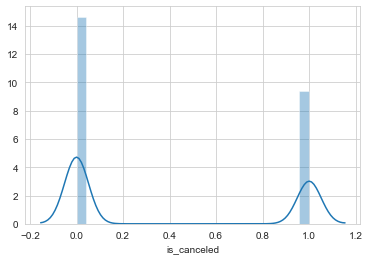

In [58]:
sns.distplot(df_3['is_canceled'])

In this plot we can see that there are more non-cancelled than cancelled reservations.

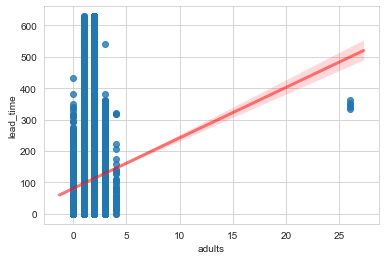

In [59]:
sns.regplot(x="adults", y="lead_time", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=df_3)

In this plot we see that as lead time increases there is a bit of a bulge in the data between 1 and 2 people but decreases again as we approach 5, but is fairly consistent with the large group opf 25.

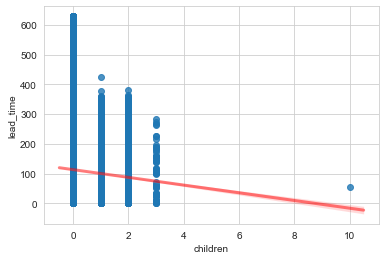

In [60]:
sns.regplot(x="children", y="lead_time", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=df_3)

In this plot we see that as the amount of children increases the lead time decreases.

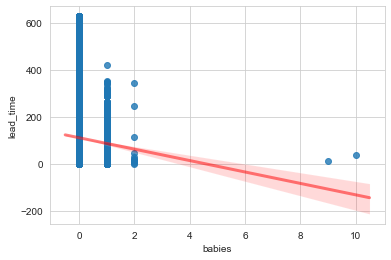

In [61]:
sns.regplot(x="babies", y="lead_time", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=df_3)

In this plot we see that as the number of babies increase that there is a very negative relationship with lead time. This shows that as the number of babies increases the lead time decreases.

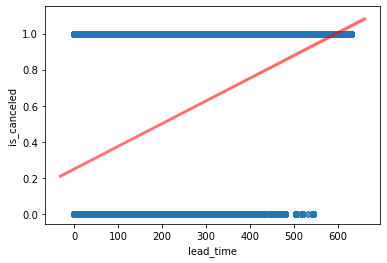

In [43]:
sns.regplot(x="lead_time", y="is_canceled", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=df_3)

In this plot we see that as lead time increases the likely hood that the reservation will be cancelled.

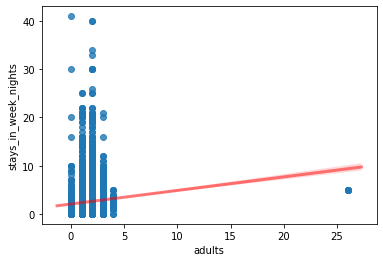

In [44]:
sns.regplot(x="adults", y="stays_in_week_nights", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=df_3)

In this plot we see that there is a slightly positive relationship between the number of adults staying in on weeknights. 

In [45]:
monthChart = df.drop_duplicates().arrival_date_month.value_counts()
monthChart

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

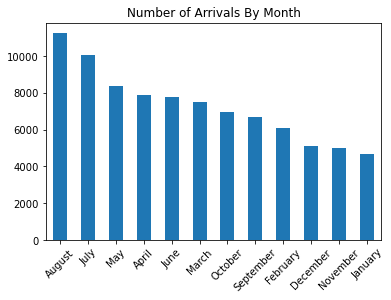

In [46]:
#Barchart of Number of Arrivals By Month
monthChart.plot(kind='bar', legend = False)
plt.title('Number of Arrivals By Month')
plt.xticks(rotation=45)

This barchart represents the total number of arrivals per month to hotels sorted highest to lowest.  From looking at the visualization it seems there might possibly be a correlation between season and amount of arrivals.  Spring and Summer seem to have the highest arrival totals because of the makeup of the top half.

In [47]:
customerTypeChart = df.drop_duplicates().customer_type.value_counts()
customerTypeChart

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

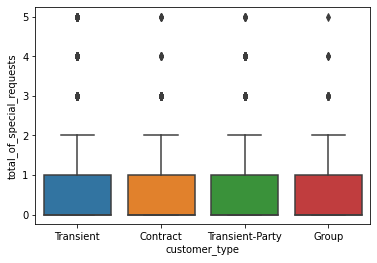

In [48]:
#boxplot of customer types and total of special requests
RequestByGuestType = sns.boxplot(x="customer_type", y="total_of_special_requests", data = df)


This boxplot shows the number of special requests for each customer type that stays at a hotel. The plot itself does not show much difference between the 4 customer types so the next visualization goes slightly deeper to see if there are differences.

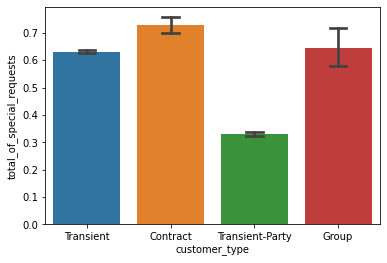

In [49]:
#Show standard deviation of observations
ax = sns.barplot(x="customer_type", y="total_of_special_requests", data = df, capsize=.2)

The barplot above also shows the total number of special requests by customer type.  This shows the frequency and error bars of the different customer types and how often they have special requests.  It seems that Transient-Parties have the lowest number of special requests compared to the other customer types.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

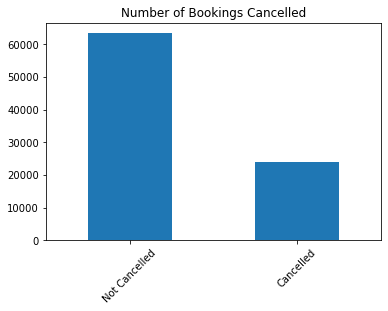

In [50]:
cancelled = df.drop_duplicates().is_canceled.value_counts()
cancelled.index = ["Not Cancelled","Cancelled"]
#Barchart of Number of Cancels and non cancels
cancelled.plot(kind='bar', legend = False)
plt.title('Number of Bookings Cancelled')
plt.xticks(rotation=45)

This barchart shows the total number of bookings that were cancelled or not cancelled.  This chart was one to inspect the numbers visually to see how many observations there would be if we wanted to do other visualizations based on comparisons of the number of cancelled bookings.

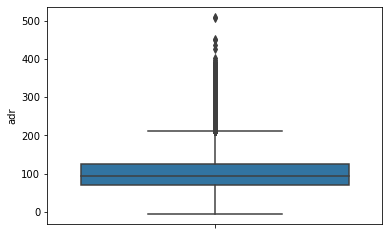

In [51]:
# Boxplot of average daily rate

price = df["adr"] < 1000
priceFix = df[price]
sns.boxplot( y=priceFix["adr"] )
#priceFix = priceF.drop_duplicates().adr.value_counts()



This boxplot shows the distribution of average daily rates paid by guests.  It seems that the median is around \\$100 with the upper bound being ~\\$210 and the lower bound being near \\$0.  The reason we think that there are guests who pay \\$0 are because of hotel rewards.

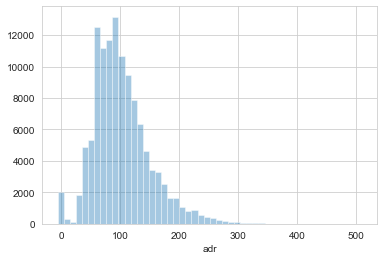

In [52]:
# Histogram of average daily rate
sns.set_style("whitegrid")
ax = sns.distplot(priceFix["adr"], kde=None)

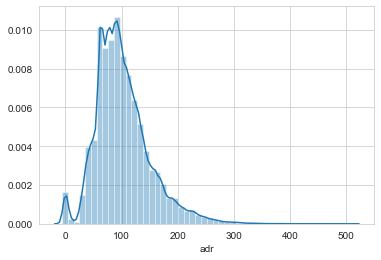

In [53]:
# Histogram + kernel density estimate
ax = sns.distplot(priceFix["adr"])

The two histograms above show the frequency of the average daily rates paid.  They are both the same but the second has the best fit line.  It seems that the boxplot and the histogram are giving the same information that the median average daily rate seems to be right around \\$100.

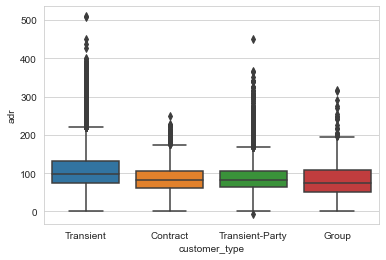

In [54]:
#Boxplot of customer type prices paid
sns.boxplot( x= priceFix["customer_type"], y=priceFix["adr"] )

This boxplot shows the average daily rate by customer type.  The goal of this visualization is to show the differences in prices paid by the different customers. The difference between the different types of customers does not have much variation, but it does seem that groups pay a lower price because they have the lowest median average daily rate.

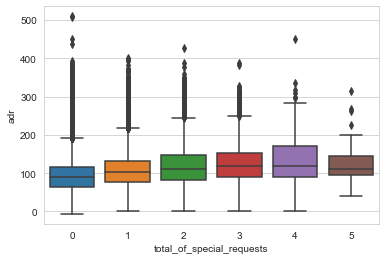

In [55]:
#Boxplot of prices paid and amount of requests made
sns.boxplot( x= priceFix["total_of_special_requests"], y=priceFix["adr"] )

This visualization is the average daily rate by the total number of special requests made.  This shows each number of requests and how much each of those paid per day.  It does seem like there might be a pattern between the two because the median rate increases as the number of requests increases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

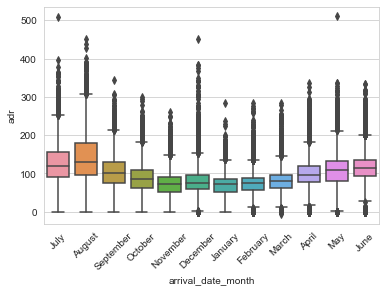

In [56]:
#boxplot of month and price
sns.boxplot( x= priceFix["arrival_date_month"], y=priceFix["adr"] )
plt.xticks(rotation=45)

This boxplot is the average daily rate by each month in the year.  It seems like there is a connection between price and season.  The prices in the spring and summer months are higher than the fall and winter months.  It would make sense if there is a connection between season and price because season and demand also look like they have a connection.  If demand is higher then prices will be higher.

# Predictive Analysis

In this section we perform predictive analysis using the K Nearest Neighbors method.  Since our dataframe is full of numeric variables we use the KNeighborRegressor fuction.

## Data Partitioning

In [64]:
from sklearn.model_selection import train_test_split

train_y, test_y, train_X, test_X = train_test_split(y, X, test_size = 0.3,
                                                     random_state=123)

In [65]:
train_X.shape

(72025, 21)

In [66]:
train_y.shape

(72025,)

In [67]:
test_X.shape

(30869, 21)

In [68]:
test_y.shape

(30869,)

## Data Normalization

In [69]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(train_X)

In [70]:
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

In [71]:
train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Const,72025.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
hotel,72025.0,0.694106,0.460788,0.0,0.000000,1.000000,1.000000,1.0
lead_time,72025.0,0.177973,0.171293,0.0,0.041335,0.127186,0.268680,1.0
arrival_date_week_number,72025.0,0.506713,0.255187,0.0,0.307692,0.519231,0.711538,1.0
arrival_date_day_of_month,72025.0,0.492793,0.292907,0.0,0.233333,0.500000,0.733333,1.0
stays_in_weekend_nights,72025.0,0.060930,0.062715,0.0,0.000000,0.062500,0.125000,1.0
stays_in_week_nights,72025.0,0.063009,0.046427,0.0,0.024390,0.048780,0.073171,1.0
adults,72025.0,0.073095,0.019033,0.0,0.076923,0.076923,0.076923,1.0
children,72025.0,0.010996,0.040993,0.0,0.000000,0.000000,0.000000,1.0
babies,72025.0,0.000784,0.010154,0.0,0.000000,0.000000,0.000000,1.0


In [72]:
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

In [73]:
test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Const,30869.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hotel,30869.0,0.686384,0.463970,0.000000,0.000000,1.000000,1.000000,1.000000
lead_time,30869.0,0.176886,0.170963,0.000000,0.041335,0.124006,0.267091,1.000000
arrival_date_week_number,30869.0,0.506078,0.255849,0.000000,0.307692,0.519231,0.711538,1.000000
arrival_date_day_of_month,30869.0,0.493125,0.293670,0.000000,0.233333,0.500000,0.766667,1.000000
stays_in_weekend_nights,30869.0,0.061617,0.062829,0.000000,0.000000,0.062500,0.125000,0.875000
stays_in_week_nights,30869.0,0.063521,0.046623,0.000000,0.024390,0.048780,0.073171,0.829268
adults,30869.0,0.073024,0.018521,0.000000,0.076923,0.076923,0.076923,1.000000
children,30869.0,0.011419,0.041672,0.000000,0.000000,0.000000,0.000000,0.300000
babies,30869.0,0.000735,0.008582,0.000000,0.000000,0.000000,0.000000,0.200000


The above blocks of code are used to normalize the data to a range from 0 to 1.  This way the data isn't incorrectly classified due to skewed data.

## KNN

In [74]:
from sklearn import neighbors

knn5 = neighbors.KNeighborsRegressor(n_neighbors=5,
                                     weights="uniform",
                                     algorithm="auto")

In [75]:
knn5.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [76]:
pred_y_knn5 = knn5.predict(test_X_scale)

Below we gather the metrics by which we could set our predictions from.

In [77]:
from sklearn import metrics

#MSE
metrics.mean_squared_error(test_y, pred_y_knn5)

0.14946386342285142

In [78]:
#R Squared
metrics.r2_score(test_y, pred_y_knn5)

0.37134158628024383

In [79]:
#RMSE
sqrt = lambda x: x**(1/2)
sqrt(metrics.mean_squared_error(test_y, pred_y_knn5))

0.386605565690474

In [80]:
#MAE
metrics.mean_absolute_error(test_y, pred_y_knn5)

0.24988823739026209

In [84]:
#Tune k based on rsme

for k in range(32):
    k = k + 1
    knn_k = neighbors.KNeighborsRegressor(n_neighbors = k,
                                          weights="uniform",
                                          algorithm="auto")
    knn_k.fit(train_X_scale, train_y)
    pred_y_k = knn_k.predict(test_X_scale)
    print("RMSE is ", 
          round(sqrt(metrics.mean_squared_error(test_y, pred_y_k)),7),
               "for k =",k)

RMSE is  0.4600042 for k = 1
RMSE is  0.4134882 for k = 2
RMSE is  0.3972579 for k = 3
RMSE is  0.3905116 for k = 4
RMSE is  0.3866056 for k = 5
RMSE is  0.3847696 for k = 6
RMSE is  0.382519 for k = 7
RMSE is  0.3814459 for k = 8
RMSE is  0.3803996 for k = 9
RMSE is  0.3804591 for k = 10
RMSE is  0.3800946 for k = 11
RMSE is  0.3799815 for k = 12
RMSE is  0.3798358 for k = 13
RMSE is  0.3797072 for k = 14
RMSE is  0.3797067 for k = 15
RMSE is  0.3798298 for k = 16
RMSE is  0.379752 for k = 17
RMSE is  0.3797593 for k = 18
RMSE is  0.379941 for k = 19
RMSE is  0.3803742 for k = 20
RMSE is  0.3806694 for k = 21
RMSE is  0.3809071 for k = 22
RMSE is  0.3809561 for k = 23
RMSE is  0.3812072 for k = 24
RMSE is  0.3812403 for k = 25
RMSE is  0.3816298 for k = 26
RMSE is  0.3818885 for k = 27
RMSE is  0.3820741 for k = 28
RMSE is  0.3823846 for k = 29
RMSE is  0.3827338 for k = 30
RMSE is  0.3828951 for k = 31
RMSE is  0.3831376 for k = 32


We decided to use RMSE for our predictive stat.  For RMSE, the k value with the lowest comparable score is the best value to base predictions off of.  Because of this we choose k=15, which has a value of 0.3797067

## KNN results at k=15

In [85]:
from sklearn import neighbors

knn15 = neighbors.KNeighborsRegressor(n_neighbors=15,
                                     weights="uniform",
                                     algorithm="auto")

In [86]:
knn15.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [87]:
pred_y_knn15 = knn15.predict(test_X_scale)

In [88]:
#MSE
metrics.mean_squared_error(test_y, pred_y_knn15)

0.1441771500354545

In [89]:
#R Squared
metrics.r2_score(test_y, pred_y_knn15)

0.3935779769087213

In [90]:
#RMSE
sqrt(metrics.mean_squared_error(test_y, pred_y_knn15))

0.3797066631433461

In [91]:
#MAE
metrics.mean_absolute_error(test_y, pred_y_knn15)

0.27339186022654877

From our results you can see that we have achieved better results.  The lower MSE indicates that we have less dispersal of our data around its mean, which is preferred.  Our higher R-squared value shows our model has an accuracy rate of around 39%-40%

## Comparison

Below we compare our chosen k value to our test value of k=5.  You can see that we have decreased our MSE and RSME values, while increasing our R-squared.  This shows that we have improved the accuracy of our model.

In [92]:
mse = [metrics.mean_squared_error(test_y, pred_y_knn5),
       metrics.mean_squared_error(test_y, pred_y_knn15)]
rsme = [sqrt(metrics.mean_squared_error(test_y, pred_y_knn5)),
        sqrt(metrics.mean_squared_error(test_y, pred_y_knn15))]
mae = [metrics.mean_absolute_error(test_y, pred_y_knn5),
       metrics.mean_absolute_error(test_y, pred_y_knn15)]
r2 = [metrics.r2_score(test_y, pred_y_knn5),
      metrics.r2_score(test_y, pred_y_knn15)]

In [93]:
pd.DataFrame({"MSE":mse, "RSME":rsme, "MAE":mae, "R Squared":r2},
             index = ["k-NN (k=5)", "k-NN (k=15)"])

,MSE,RSME,MAE,R Squared
k-NN (k=5),0.149464,0.386606,0.249888,0.371342
k-NN (k=15),0.144177,0.379707,0.273392,0.393578


# Findings Summarization

From the analysis performed, we were able to see that the biggest factors that determined whether a customer would cancel their booking were the lead time, where customers with more time in between when they created their booking and the actual date of the booking were more likely to cancel, and deposit type, where bookings with no deposit required actually had less likelihood of being cancelled.  

We found that customers spend an average of \\$100 per day for a hotel, and that this rate increases as the number of special requests increases.

Spring and summer months have more average arrivals while also having an increase in the average daily rate.

Contract-type customers tend to have more special requests than other kinds of customers.

For predictive analysis, we found that a group of 15 neighbors produced the most accurate predictions.